<a href="https://colab.research.google.com/github/neel26desai/data_cleaning_and_eda/blob/main/EDAImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective
Perform data cleaning processing and EDA on FashionMNIST Dataset and create a classification model to classify a clothing item

In [ ]:
! pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 65.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 44.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 75.3 MB/s

## Loading the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pycaret


In [ ]:
#loading the dataset
# Load dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


## EDA
When it comes to EDA of images, the process is different then that of tabular data

In [ ]:
#check the shape of the data
print('Training Images : ',train_images.shape) # we have 60000 images of 28px by 28px, each image is taking only one channel so its a greyscale image
print('Traing Labels: ', train_labels.shape)
print('Testing Images: ',test_images.shape)
print('Testing Labels: ', test_labels.shape)

Training Images :  (60000, 28, 28)
Traing Labels:  (60000,)
Testing Images:  (10000, 28, 28)
Testing Labels:  (10000,)


Label to Item Mapping
<ol>
<li> T-shirt/top
<li> Trouser
<li> Pullover
<li> Dress
<li> Coat
<li> Sandal
<li> Shirt
<li> Sneaker
<li> Bag
<li> Ankle boot
</ol>

In [ ]:
#finding the number of different classes and their count
unique, counts = np.unique(train_labels, return_counts=True)
frequency_count = dict(zip(unique, counts))
print(frequency_count)

{0: 6000, 1: 6000, 2: 6000, 3: 6000, 4: 6000, 5: 6000, 6: 6000, 7: 6000, 8: 6000, 9: 6000}


Based on this we can say that the dataset is balanced.

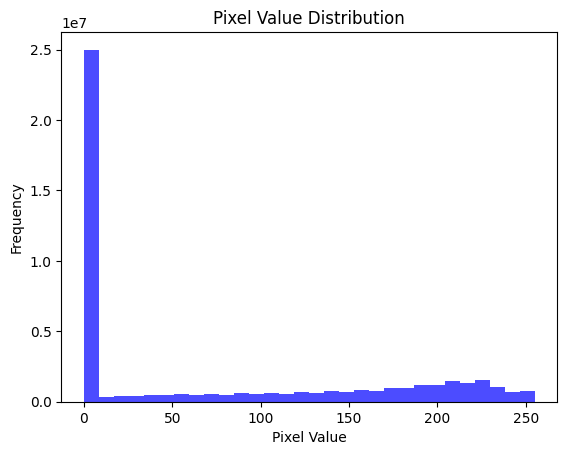

In [ ]:
#let su check the pixel value counts
# 4. Pixel Value Distribution
plt.figure()
plt.title('Pixel Value Distribution')
plt.hist(train_images.flatten(), bins=30, color='blue', alpha=0.7)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#we have way too many values at zeroand the value rangeis wide, so lets fix that by normalizig the pixel value
train_images = train_images/255 #255 is the max value a pixel can have
test_images = test_images/255


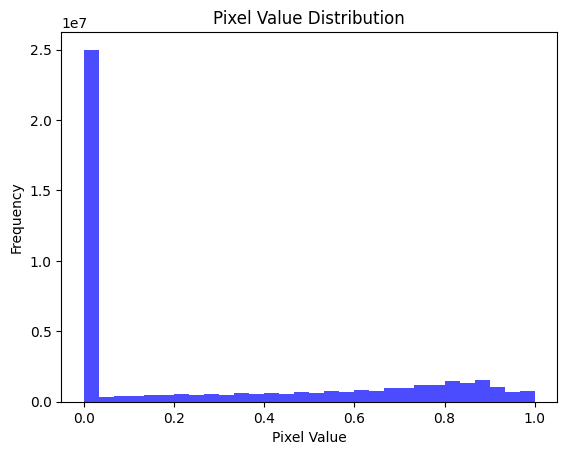

In [ ]:
#let us check the pixel value counts
plt.figure()
plt.title('Pixel Value Distribution')
plt.hist(train_images.flatten(), bins=30, color='blue', alpha=0.7)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

The frequency distribution remains the same but the range is of possible values are much smaller now

In [ ]:
class_idx = {}

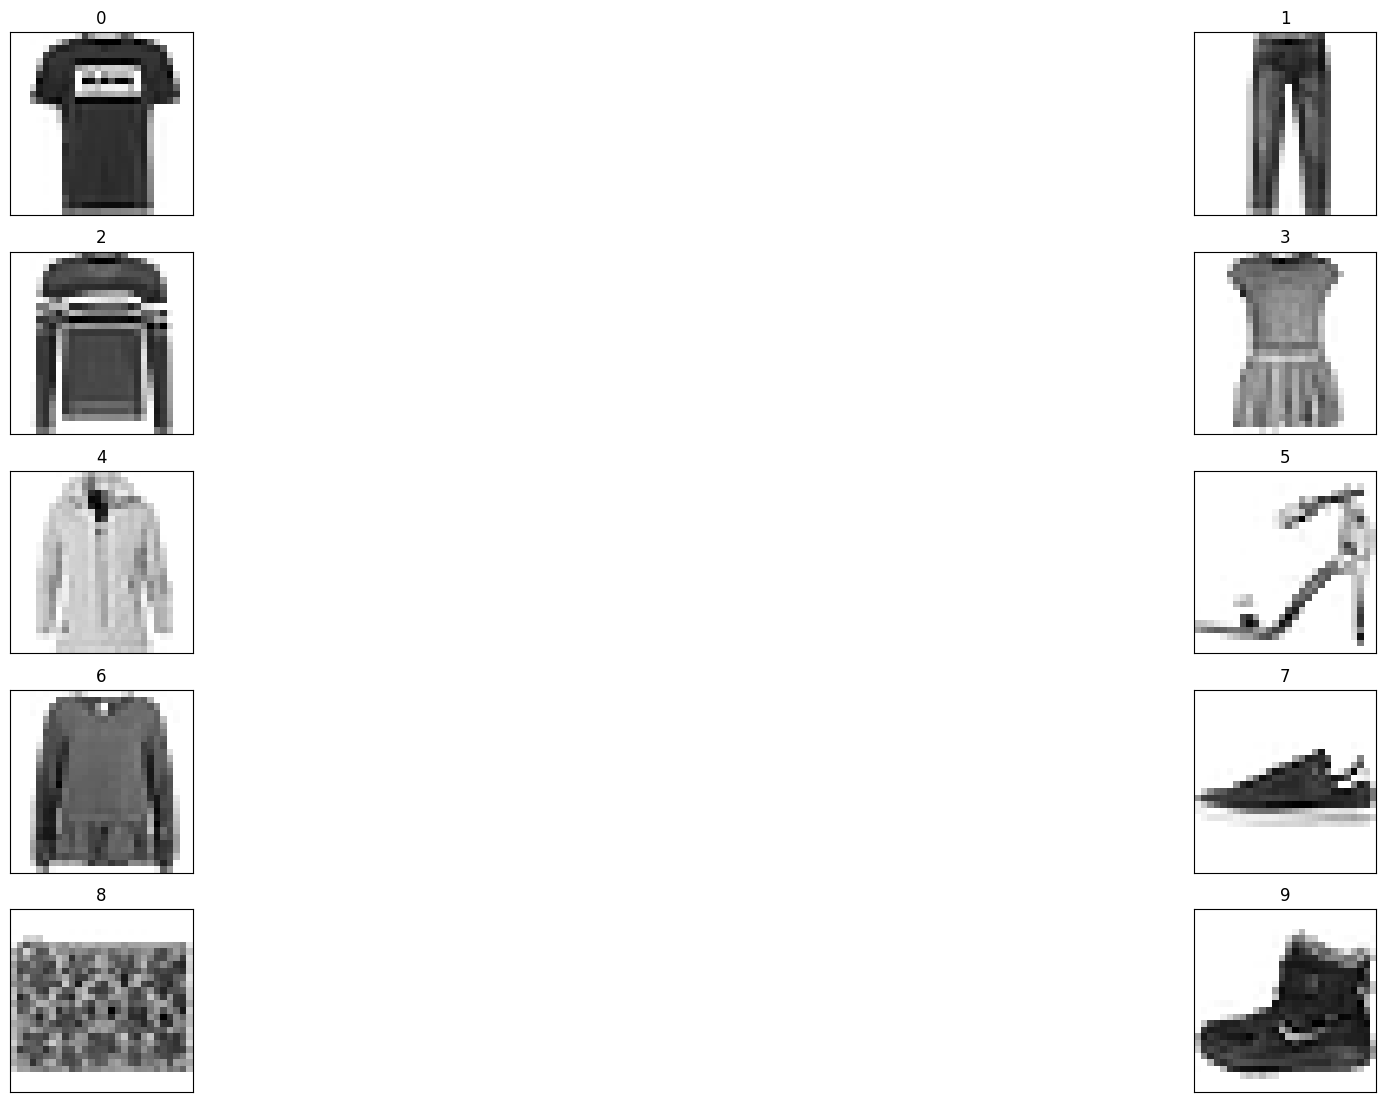

In [ ]:
#let us visualize an image of each class
plt.figure(figsize=(28,28))
for j,i in enumerate(frequency_count.keys(),start=1):
  #finding the first occurence of each class label
  class_idx[i] = np.where(train_labels == i)
  first_occurence = class_idx[i][0][0]
  plt.subplot(10,2,j)
  plt.title(train_labels[first_occurence])
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[first_occurence], cmap=plt.cm.binary)



## Check for missing or corrupted data

For the data set which we have choosen all the images are in the same size, there are no corrupted images and based on featuer description ther e

## Average Image
Compute and visualize the average image for each class. This can give a representative look for each class.

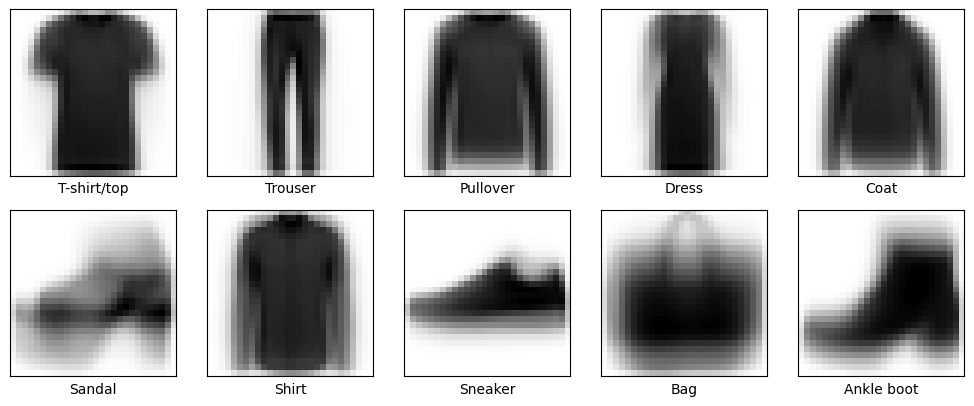

In [ ]:
# Define the class names for the labels
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Compute the average image for each class
avg_images = {}
for i, class_name in enumerate(class_names):
    avg_image = np.mean(train_images[train_labels == i], axis=0)
    avg_images[class_name] = avg_image

# Visualize the average images
plt.figure(figsize=(10,10))
for i, class_name in enumerate(class_names):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(avg_images[class_name], cmap=plt.cm.binary)
    plt.xlabel(class_name)
plt.tight_layout()
plt.show()

## Variability Within Classes:

Compute some measure of variability for images within each class, such as the standard deviation.
This can help understand the intra-class variability.

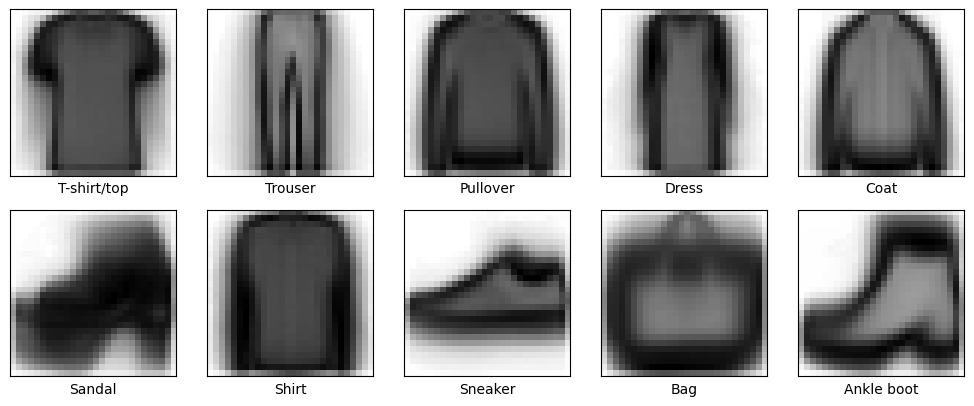

In [ ]:
# Compute the standard deviation image for each class
std_images = {}
for i, class_name in enumerate(class_names):
    std_image = np.std(train_images[train_labels == i], axis=0)
    std_images[class_name] = std_image

# Visualize the standard deviation images
plt.figure(figsize=(10,10))
for i, class_name in enumerate(class_names):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(std_images[class_name], cmap=plt.cm.binary)
    plt.xlabel(class_name)
plt.tight_layout()
plt.show()

From this we can say say that the 2 classes with the most variability are Sandals and Bag

## Outlier Detection

In [ ]:
#images the are either too bright or too dark can be consider as outlier
# Compute the mean brightness of each image
mean_brightness = np.mean(train_images, axis=(1,2))

# Define a threshold for considering an image too bright or too dark
lower_threshold = np.percentile(mean_brightness, 1)  # 1st percentile
upper_threshold = np.percentile(mean_brightness, 99) # 99th percentile

# Get the indices of images that are too bright or too dark
dark_images = np.where(mean_brightness < lower_threshold)
bright_images = np.where(mean_brightness > upper_threshold)

print(f"Number of dark images: {len(dark_images[0])}")
print(f"Number of bright images: {len(bright_images[0])}")



Number of dark images: 600
Number of bright images: 600


In [ ]:
dark_images[0][1]

339

In [ ]:
#let us check if all outliers belong to the same set of class,
dark_outliers = {}
bright_outliers = {}
for i in dark_images[0]:
  if train_labels[i] not in dark_outliers:
    dark_outliers[train_labels[i]]=[i]
  else:
    dark_outliers[train_labels[i]].append(i)

for i in bright_images[0]:
  if train_labels[i] not in bright_outliers:
    bright_outliers[train_labels[i]]=[i]
  else:
    bright_outliers[train_labels[i]].append(i)

print('Dark Outliers per class')
for k,v in dark_outliers.items():
  print(f'Class : {k}, Outliers: {len(v)}')

print('Brght Outliers per class')
for k,v in bright_outliers.items():
  print(f'Class : {k}, Outliers: {len(v)}')



Dark Outliers per class
Class : 5, Outliers: 489
Class : 4, Outliers: 6
Class : 7, Outliers: 49
Class : 0, Outliers: 20
Class : 6, Outliers: 14
Class : 3, Outliers: 12
Class : 1, Outliers: 2
Class : 2, Outliers: 2
Class : 8, Outliers: 5
Class : 9, Outliers: 1
Brght Outliers per class
Class : 2, Outliers: 201
Class : 8, Outliers: 189
Class : 4, Outliers: 37
Class : 6, Outliers: 130
Class : 0, Outliers: 38
Class : 1, Outliers: 4
Class : 3, Outliers: 1


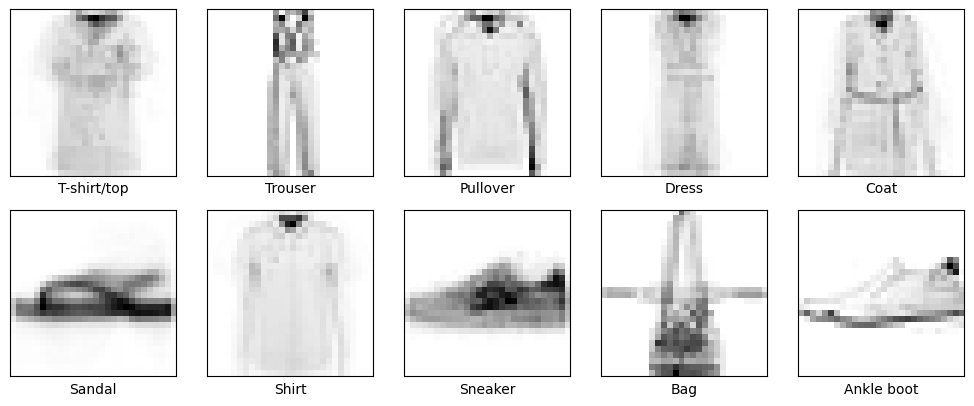

In [ ]:
#for each class let us visualize the average outliers
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Compute the average image for each class
avg_images = {}
for i, class_name in enumerate(class_names):
    avg_image = np.mean(train_images[dark_outliers[i]], axis=0)
    avg_images[class_name] = avg_image

# Visualize the average images
plt.figure(figsize=(10,10))
for i, class_name in enumerate(class_names):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(avg_images[class_name], cmap=plt.cm.binary)
    plt.xlabel(class_name)
plt.tight_layout()
plt.show()

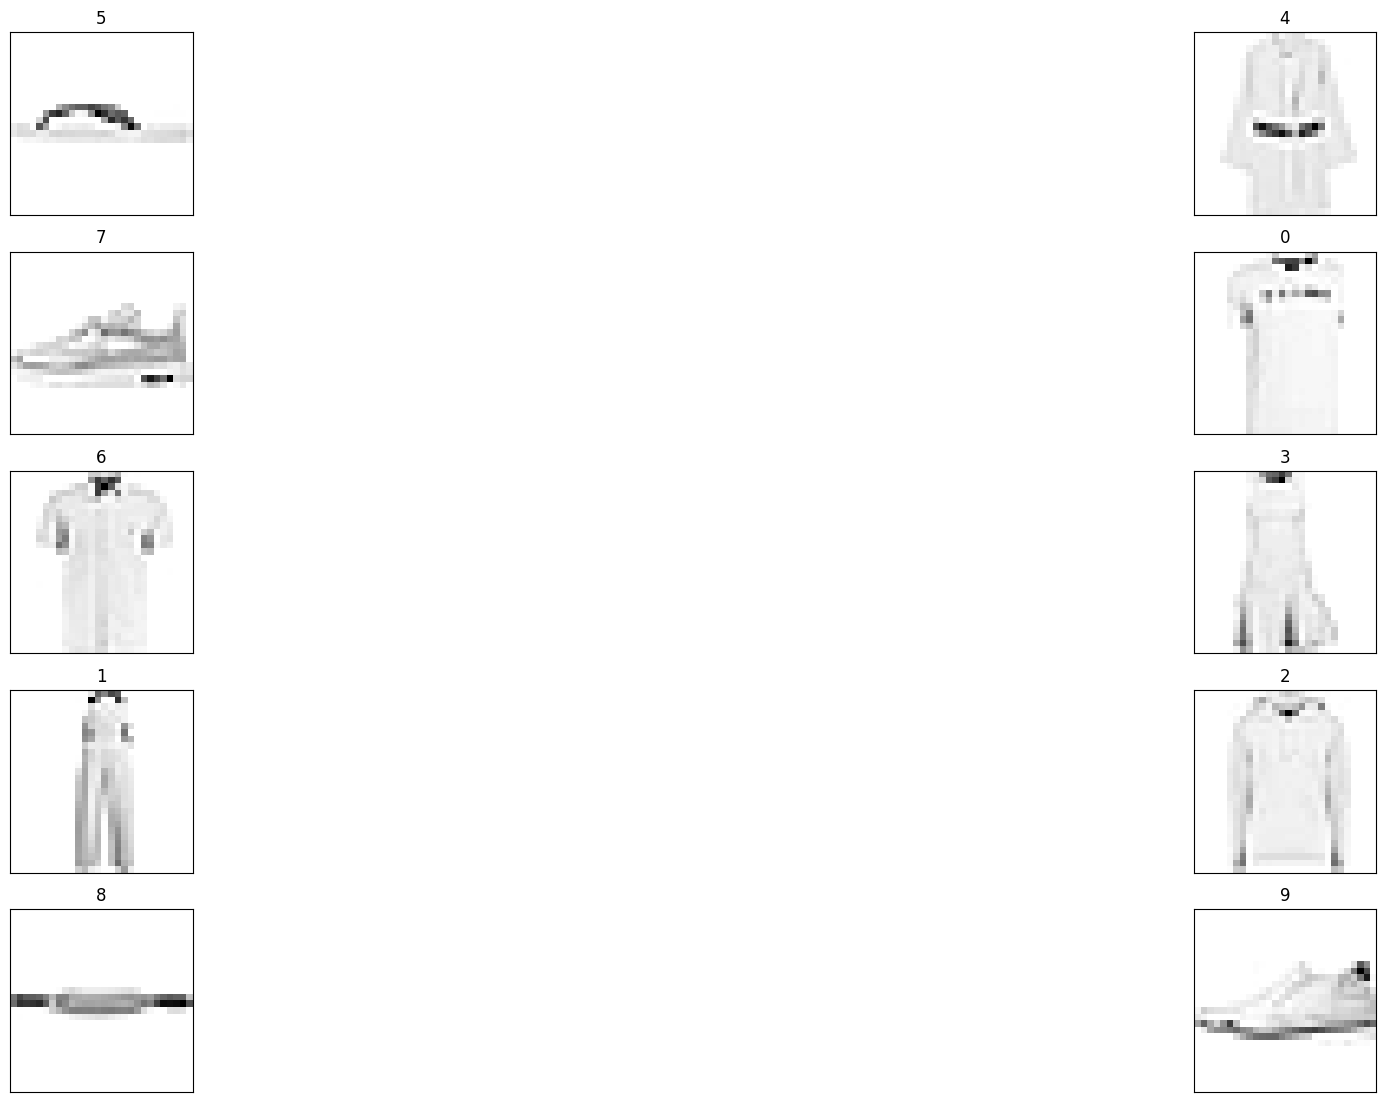

In [ ]:
#visualizing individual outliers per class
#let us visualize an image of each class
plt.figure(figsize=(28,28))
for j,i in enumerate(dark_outliers,start=1):
  #finding the first occurence of each class label
  plt.subplot(10,2,j)
  plt.title(train_labels[dark_outliers[i][0]])
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[dark_outliers[i][0]], cmap=plt.cm.binary)



## Dimensionality Reduction
In our case as the imags are very small we dont have to perform dimentionality reduction.

## Data Cleaning

### Handling Duplicates

In [ ]:
#we can find duplicate images by flattening the images and converting them intostring or array and themcomparing the array
# Convert images to string representations
image_strs = [''.join(map(str, img.flatten())) for img in train_images]

# Use pandas to find duplicates

df = pd.DataFrame({
    'image_str': image_strs,
    'label': train_labels
})

duplicates = df[df.duplicated(subset='image_str', keep=False)]  # 'keep=False' marks all duplicates
print(f"Number of duplicate images: {len(duplicates)}")


Number of duplicate images: 0


## Feature Extraction

### Extracting Image Features

#### Textures

In [ ]:
from skimage.feature import greycomatrix, greycoprops
from skimage.color import rgb2gray
from skimage import img_as_ubyte
def extract_glcm_features(row):
    image = row.to_numpy().reshape((28,28))

    # Convert image to 8-bit unsigned byte format
    image = img_as_ubyte(image)

    # Compute GLCM
    glcm = greycomatrix(image, distances=[1], angles=[0], symmetric=True, normed=True)

    # Extract features from GLCM
    contrast = greycoprops(glcm, 'contrast')[0][0]
    dissimilarity = greycoprops(glcm, 'dissimilarity')[0][0]
    homogeneity = greycoprops(glcm, 'homogeneity')[0][0]
    energy = greycoprops(glcm, 'energy')[0][0]
    correlation = greycoprops(glcm, 'correlation')[0][0]

    return contrast, dissimilarity, homogeneity, energy, correlation



In [ ]:
train_df = pd.DataFrame(train_images.reshape(60000,784))
test_df = pd.DataFrame (test_images.reshape(10000,784))

combined_data = pd.concat([train_df,test_df],axis = 0, ignore_index=True)
combined_data.columns = [i for i in range(28*28)]
a = combined_data.apply(extract_glcm_features,axis=1)


## Preparing data for training purpose

In [ ]:
for i in a:
  print(i)
  break

(1842.1203703703702, 17.89550264550265, 0.45551631176111645, 0.39506443490821463, 0.9117906519013959)


In [ ]:
contrast, dissimilarity, homogeneity, energy, correlation =[],[],[],[],[]
for i in a:
  contrast.append(i[0])
  dissimilarity.append(i[1])
  homogeneity.append(i[2])
  energy.append(i[3])
  correlation.append(i[4])

In [ ]:
combined_data['contrast'] = contrast
combined_data['dissimilarity'] = dissimilarity
combined_data['homogeneity'] = homogeneity
combined_data['energy'] = energy
combined_data['correlation'] = correlation

In [ ]:
## adding the labels
combined_data['label']=np.concatenate([train_labels,test_labels])

## Modelling

In [ ]:
old_columns = combined_data.columns
new_col = ['pixel'+str(i) for i in range(28*28)]
new_col.append('contrast')
new_col.append('dissimilarity')
new_col.append('homogeneity')
new_col.append('energy')
new_col.append('correlation')


In [ ]:
combined_data.rename(columns=dict(zip(old_columns,new_col)))

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,...,pixel540,pixel541,pixel542,pixel543,pixel544,pixel545,pixel546,pixel547,pixel548,pixel549,pixel550,pixel551,pixel552,pixel553,pixel554,pixel555,pixel556,pixel557,pixel558,pixel559,pixel560,pixel561,pixel562,pixel563,pixel564,pixel565,pixel566,pixel567,pixel568,pixel569,pixel570,pixel571,pixel572,pixel573,pixel574,pixel575,pixel576,pixel577,pixel578,pixel579,pixel580,pixel581,pixel582,pixel583,pixel584,pixel585,pixel586,pixel587,pixel588,pixel589,pixel590,pixel591,pixel592,pixel593,pixel594,pixel595,pixel596,pixel597,pixel598,pixel599,pixel600,pixel601,pixel602,pixel603,pixel604,pixel605,pixel606,pixel607,pixel608,pixel609,pixel610,pixel611,pixel612,pixel613,pixel614,pixel615,pixel616,pixel617,pixel618,pixel619,pixel620,pixel621,pixel622,pixel623,pixel624,pixel625,pixel626,pixel627,pixel628,pixel629,pixel630,pixel631,pixel632,pixel633,pixel634,pixel635,pixel636,pixel637,pixel638,pixel639,pixel640,pixel641,pixel642,pixel643,pixel644,pixel645,pixel646,pixel647,pixel648,pixel649,pixel650,pixel651,pixel652,pixel653,pixel654,pixel655,pixel656,pixel657,pixel658,pixel659,pixel660,pixel661,pixel662,pixel663,pixel664,pixel665,pixel666,pixel667,pixel668,pixel669,pixel670,pixel671,pixel672,pixel673,pixel674,pixel675,pixel676,pixel677,pixel678,pixel679,pixel680,pixel681,pixel682,pixel683,pixel684,pixel685,pixel686,pixel687,pixel688,pixel689,pixel690,pixel691,pixel692,pixel693,pixel694,pixel695,pixel696,pixel697,pixel698,pixel699,pixel700,pixel701,pixel702,pixel703,pixel704,pixel705,pixel706,pixel707,pixel708,pixel709,pixel710,pixel711,pixel712,pixel713,pixel714,pixel715,pixel716,pixel717,pixel718,pixel719,pixel720,pixel721,pixel722,pixel723,pixel724,pixel725,pixel726,pixel727,pixel728,pixel729,pixel730,pixel731,pixel732,pixel733,pixel734,pixel735,pixel736,pixel737,pixel738,pixel739,pixel740,pixel741,pixel742,pixel743,pixel744,pixel745,p

In [ ]:
combined_data.select_dtypes(exclude=['int64','float64']).columns

Index(['label'], dtype='object')

In [ ]:
combined_data.columns = combined_data.columns.astype(str)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [ ]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(combined_data.drop(['label'],axis=1), combined_data['label'], test_size=0.25)

In [ ]:
# Create an MLP classifier
clf = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam')

In [ ]:
# Train the classifier
clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
print(f'Accuracy: {clf.score(X_test, y_test)}')

Accuracy: 0.8794857142857143


The accuracy is satisfactory